## Basic Exploratory Data Analysis on Lagos House Prices
- The dataset contains 5336 records of rental properties around 7 locations in Lagos. The dataset was sourced from a Nigeria real estate company website.

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load and read the dataset
lagos_data = pd.read_csv(r'C:\Users\user\OneDrive\Documents\ML Notebooks\Python_for_Data_Science_files\lagos_house_prices_raw.csv') # excel
lagos_data

,location,bed,bath,toilet,price,Property_Type,Parking_Space,Security,Electricity,Furnished,Security_Doors,CCTV,Pool,Gym,BQ
0,yaba,1,1,2,700000.0,Mini flat,0,0,0,0,0,0,0,0,0
1,yaba,1,1,2,700000.0,Mini flat,0,0,0,0,0,0,0,0,0
2,yaba,1,1,2,650000.0,Mini flat,0,0,0,0,0,0,0,0,0
3,yaba,1,1,1,450000.0,Mini flat,0,0,0,0,0,0,0,0,0
4,yaba,3,3,4,800000.0,Detached duplex,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5331,ajah,1,1,2,600000.0,Mini flat,1,0,0,0,0,0,0,0,0
5332,ajah,2,2,2,700000.0,Mini flat,1,0,0,0,0,0,0,0,0
5333,ajah,4,4,5,1700000.0,Semi detached duplex,1,0,0,0,0,0,0,0,0
5334,ajah,1,1,2,500000.0,Mini flat,0,0,0,0,0,0,0,0,0


In [3]:
# check for the first five rows
lagos_data.head()

,location,bed,bath,toilet,price,Property_Type,Parking_Space,Security,Electricity,Furnished,Security_Doors,CCTV,Pool,Gym,BQ
0,yaba,1,1,2,700000.0,Mini flat,0,0,0,0,0,0,0,0,0
1,yaba,1,1,2,700000.0,Mini flat,0,0,0,0,0,0,0,0,0
2,yaba,1,1,2,650000.0,Mini flat,0,0,0,0,0,0,0,0,0
3,yaba,1,1,1,450000.0,Mini flat,0,0,0,0,0,0,0,0,0
4,yaba,3,3,4,800000.0,Detached duplex,0,1,0,0,0,0,0,0,0


In [4]:
# check for the last five rows
lagos_data.tail()

,location,bed,bath,toilet,price,Property_Type,Parking_Space,Security,Electricity,Furnished,Security_Doors,CCTV,Pool,Gym,BQ
5331,ajah,1,1,2,600000.0,Mini flat,1,0,0,0,0,0,0,0,0
5332,ajah,2,2,2,700000.0,Mini flat,1,0,0,0,0,0,0,0,0
5333,ajah,4,4,5,1700000.0,Semi detached duplex,1,0,0,0,0,0,0,0,0
5334,ajah,1,1,2,500000.0,Mini flat,0,0,0,0,0,0,0,0,0
5335,ajah,4,4,5,1800000.0,Semi detached duplex,1,1,0,1,0,0,0,0,0


## Data Inspection and Manipulation

In [5]:
# shape of the data
lagos_data.shape

(5336, 15)

In [6]:
# check the columns
lagos_data.columns

Index(['location', 'bed', 'bath', 'toilet', 'price', 'Property_Type',
       'Parking_Space', 'Security', 'Electricity', 'Furnished',
       'Security_Doors', 'CCTV', 'Pool', 'Gym', 'BQ'],
      dtype='object')

In [7]:
# check the data types
lagos_data.dtypes

location           object
bed                 int64
bath                int64
toilet              int64
price             float64
Property_Type      object
Parking_Space       int64
Security            int64
Electricity         int64
Furnished           int64
Security_Doors      int64
CCTV                int64
Pool                int64
Gym                 int64
BQ                  int64
dtype: object

In [8]:
# info about the data
lagos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5336 entries, 0 to 5335
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        5336 non-null   object 
 1   bed             5336 non-null   int64  
 2   bath            5336 non-null   int64  
 3   toilet          5336 non-null   int64  
 4   price           5336 non-null   float64
 5   Property_Type   5336 non-null   object 
 6   Parking_Space   5336 non-null   int64  
 7   Security        5336 non-null   int64  
 8   Electricity     5336 non-null   int64  
 9   Furnished       5336 non-null   int64  
 10  Security_Doors  5336 non-null   int64  
 11  CCTV            5336 non-null   int64  
 12  Pool            5336 non-null   int64  
 13  Gym             5336 non-null   int64  
 14  BQ              5336 non-null   int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 625.4+ KB


In [13]:
# check if there are missing values # isna() # isnull()
lagos_data.isnull().sum()

location          0
bed               0
bath              0
toilet            0
price             0
Property_Type     0
Parking_Space     0
Security          0
Electricity       0
Furnished         0
Security_Doors    0
CCTV              0
Pool              0
Gym               0
BQ                0
dtype: int64

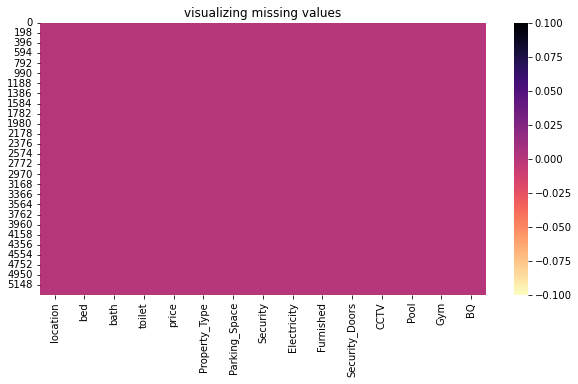

In [14]:
# visualize the missing values
plt.figure(figsize = (10, 5))
plt.title('visualizing missing values')
sns.heatmap(lagos_data.isnull(), cbar = True, cmap = 'magma_r')
plt.show()

## Exploratory Data Analysis: Relationship, Insights and Visualization
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

### Univariate Analysis
- it is considering one feature of a dataset

In [15]:
lagos_data.columns

Index(['location', 'bed', 'bath', 'toilet', 'price', 'Property_Type',
       'Parking_Space', 'Security', 'Electricity', 'Furnished',
       'Security_Doors', 'CCTV', 'Pool', 'Gym', 'BQ'],
      dtype='object')

In [1]:
# How many listings are there per location?
count_listing = lagos_data['location'].value_counts().sort_values(ascending = True)
count_listing

NameError: name 'lagos_data' is not defined

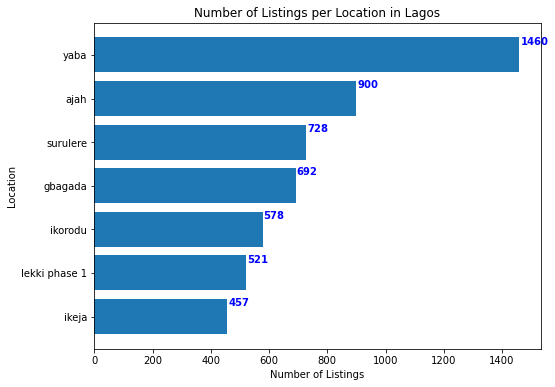

In [25]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a horizontal bar chart
plt.barh(count_listing.index, count_listing.values)

# Add data labels to the chart
for i, v in enumerate(count_listing.values):
    plt.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

# Set the title and axis labels
plt.title('Number of Listings per Location in Lagos')
plt.xlabel('Number of Listings')
plt.ylabel('Location')

# Display the chart
plt.show()


In [ ]:
### Observation
Yaba has the highest listing with a total value of 1460 while Ikeja has the lowest with a total value of 457.

### Bivariate Analysis
- It is a consideration of two features. It can either be categorical vs numerical or numerical vs numerical.


In [27]:
# Summary statistics per location and price
lagos_data.groupby('location')['price'].describe().astype('int')

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
ajah,900,693335,475287,120000,400000,500000,800000,2400000
gbagada,692,742290,451011,150,400000,600000,900000,2300000
ikeja,457,772700,506704,4000,450000,600000,850000,2300000
ikorodu,578,155095,138067,16000,100000,100000,160000,1500000
lekki phase 1,521,1211013,489304,3000,800000,1300000,1500000,2450000
surulere,728,589189,335065,130000,350000,500000,700000,2300000
yaba,1460,550986,331439,250,350000,450000,650000,2000000


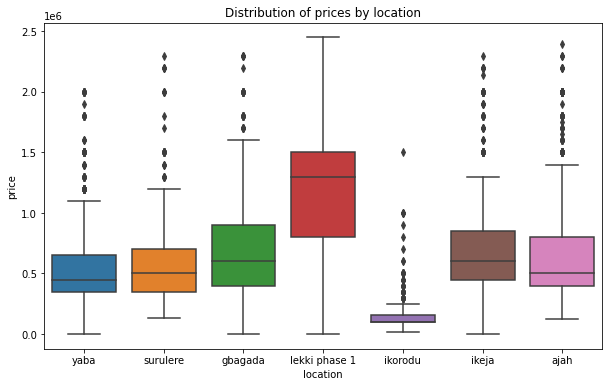

In [29]:
# view distribution of prices by location
plt.figure(figsize = (10, 6))
sns.boxplot(x = lagos_data['location'], y = lagos_data['price'], data = lagos_data)
plt.title('Distribution of prices by location')
plt.show()

### Observation
we can see that the most expensive houses are located in Lekki-phase 1 with the median price to be 1.25 million while the least houses are located in Ikorodu with the median price to be 100000 compared to other locations.

In [31]:
# which district or location is with more security facilities like CCTV Camera?
cctv_loc = lagos_data.groupby('location')['CCTV'].sum().sort_values()
cctv_loc

location
lekki phase 1     0
gbagada           1
ajah              3
ikeja             5
yaba              5
ikorodu           8
surulere         12
Name: CCTV, dtype: int64

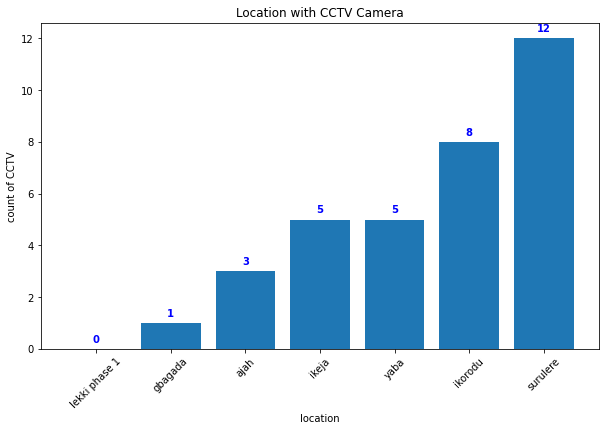

In [40]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a horizontal bar chart
plt.bar(cctv_loc.index, cctv_loc.values)

# Add data labels to the chart
for i, v in enumerate(cctv_loc.values):
    plt.text(i, v + 0.25, str(v), color='blue', fontweight='bold', ha='center')

# Set the title and axis labels
plt.title('Location with CCTV Camera')
plt.xlabel('location')
plt.ylabel('count of CCTV')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the chart
plt.show()


In [2]:
# what houses types are the cheapest for the highest number of rooms for families that want affordable housing?
min_loc = lagos_data.groupby('Property_Type')['price'].min().sort_values()
min_loc

NameError: name 'lagos_data' is not defined

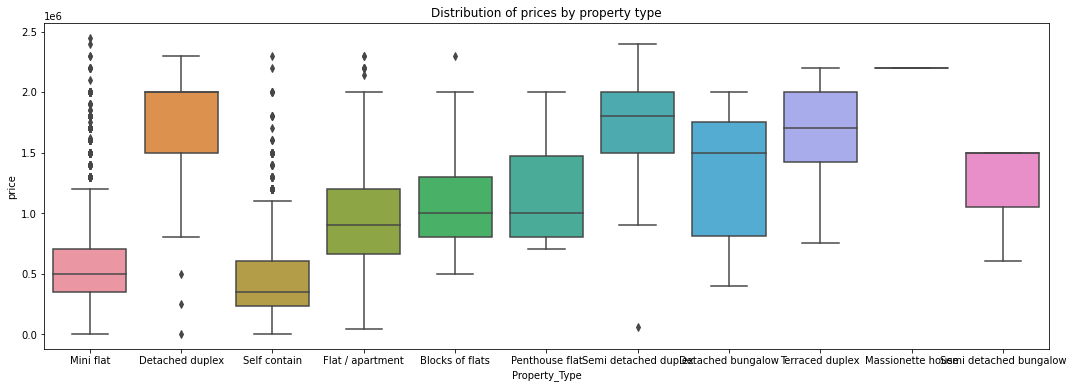

In [46]:
# view distribution of prices by Property type
plt.figure(figsize = (18, 6))
sns.boxplot(x = lagos_data['Property_Type'], y = lagos_data['price'], data = lagos_data)
plt.title('Distribution of prices by property type')
plt.show()

In [50]:
# To know the location for the cheapest self contain
self_loc = lagos_data.groupby(['location', 'Property_Type'])['price'].min().astype('int64').unstack('Property_Type')
self_loc

Property_Type,Blocks of flats,Detached bungalow,Detached duplex,Flat / apartment,Massionette house,Mini flat,Penthouse flat,Self contain,Semi detached bungalow,Semi detached duplex,Terraced duplex
location,,,,,,,,,,,
ajah,650000.0,600000.0,500000.0,180000.0,NaN,200000.0,700000.0,120000.0,600000.0,900000.0,750000.0
gbagada,650000.0,1000000.0,900000.0,45000.0,NaN,150000.0,800000.0,150.0,NaN,1200000.0,1500000.0
ikeja,1000000.0,1500000.0,4000.0,300000.0,NaN,200000.0,NaN,180000.0,NaN,60000.0,1800000.0
ikorodu,NaN,450000.0,NaN,120000.0,NaN,16000.0,NaN,36000.0,NaN,1000000.0,NaN
lekki phase 1,NaN,400000.0,250000.0,600000.0,2200000.0,3000.0,1600000.0,10000.0,NaN,1500000.0,1600000.0
surulere,500000.0,1500000.0,1000000.0,350000.0,NaN,150000.0,850000.0,130000.0,NaN,2000000.0,NaN
yaba,600000.0,NaN,800000.0,300000.0,NaN,35000.0,800000.0,250.0,NaN,2000000.0,NaN


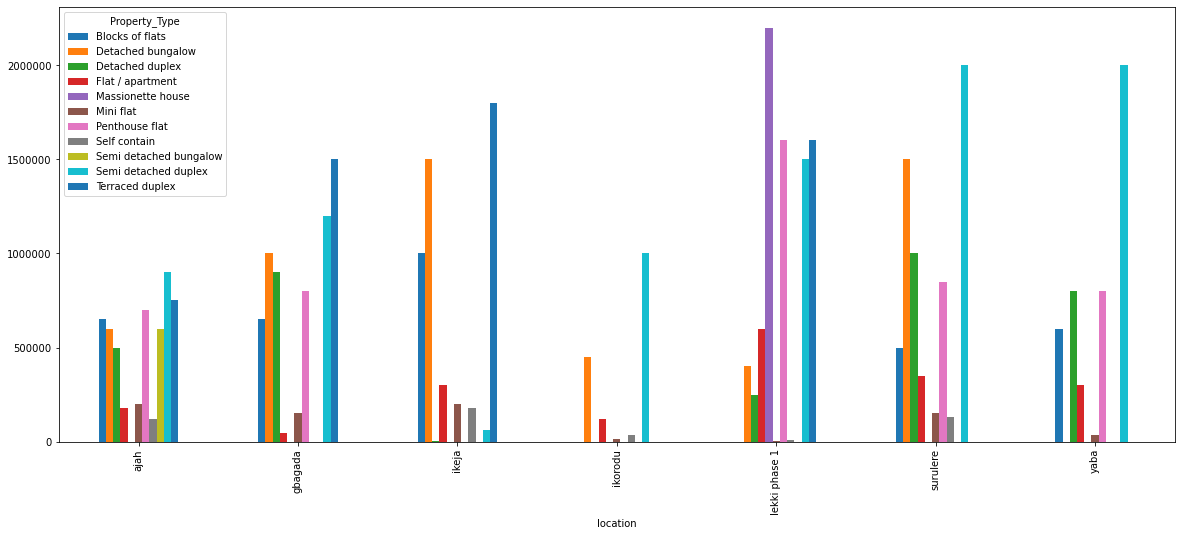

In [52]:
# plot a pivot table
self_loc.plot.bar(figsize = (20, 8))
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show()

In [53]:
# Top 3 location by price
top3_loc = lagos_data.groupby('location')['price'].sum()[:3]
top3_loc

location
ajah       624002009.0
gbagada    513665150.0
ikeja      353124000.0
Name: price, dtype: float64

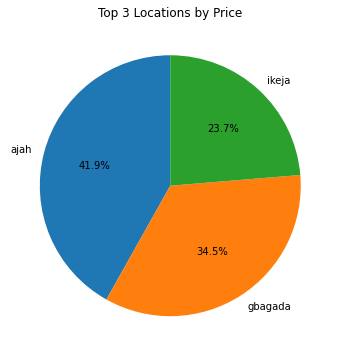

In [58]:
# Bottom 3 locations by price
bot3_loc = lagos_data.groupby('location')['price'].sum()[4:].sort_values()
bot3_loc

location
surulere         428930009.0
lekki phase 1    630938000.0
yaba             804440839.0
Name: price, dtype: float64

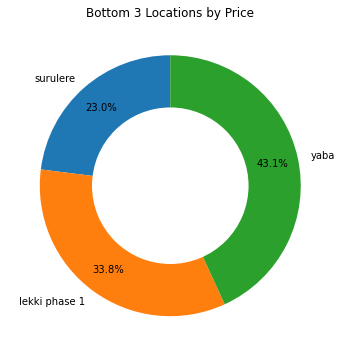

In [59]:
# Set the figure size
fig, ax = plt.subplots(figsize=(8, 6))

# Create a donut chart
ax.pie(bot3_loc.values, labels=bot3_loc.index, autopct='%1.1f%%', startangle=90, pctdistance=0.8, labeldistance=1.1)
ax.pie([1], colors=['white'], radius=0.6)

# Add a circle to create a donut chart
circle = plt.Circle((0,0), 0.5, color='white')
ax.add_artist(circle)

# Set the title
plt.title('Bottom 3 Locations by Price')

# Display the chart
plt.show()


<AxesSubplot:xlabel='toilet', ylabel='price'>

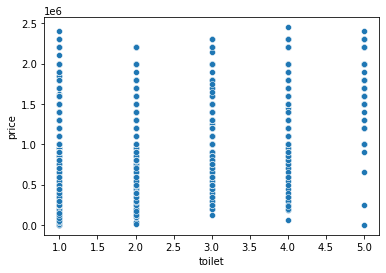

In [65]:
# compare price and parking space
sns.scatterplot(x = 'toilet', y = 'price', data = lagos_data)

<AxesSubplot:xlabel='toilet', ylabel='price'>

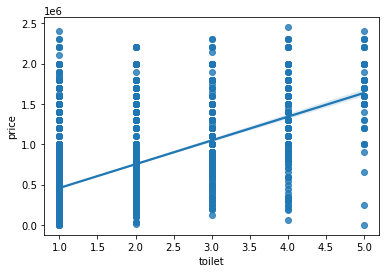

In [66]:
# compare price and parking space
sns.regplot(x = 'toilet', y = 'price', data = lagos_data)

## Observation
There is a positve correlation  between price and toilet, it means as toilet increases the price of house increase.

In [64]:
lagos_data.head()

,location,bed,bath,toilet,price,Property_Type,Parking_Space,Security,Electricity,Furnished,Security_Doors,CCTV,Pool,Gym,BQ
0,yaba,1,1,2,700000.0,Mini flat,0,0,0,0,0,0,0,0,0
1,yaba,1,1,2,700000.0,Mini flat,0,0,0,0,0,0,0,0,0
2,yaba,1,1,2,650000.0,Mini flat,0,0,0,0,0,0,0,0,0
3,yaba,1,1,1,450000.0,Mini flat,0,0,0,0,0,0,0,0,0
4,yaba,3,3,4,800000.0,Detached duplex,0,1,0,0,0,0,0,0,0


## Multivariate Analysis
- it comparing two or more variables of a dataset

In [68]:
# Get the numerical values of the dataset
num_values = lagos_data.describe()

# Display the numerical values
num_values

,bed,bath,toilet,price,Parking_Space,Security,Electricity,Furnished,Security_Doors,CCTV,Pool,Gym,BQ
count,5336.000000,5336.000000,5336.000000,5.336000e+03,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000
mean,1.393178,1.447901,1.637181,6.455669e+05,0.122001,0.104573,0.023051,0.020240,0.000937,0.006372,0.005997,0.001312,0.013306
std,0.773157,0.793780,0.965145,4.693053e+05,0.327318,0.306031,0.150079,0.140833,0.030599,0.079576,0.077215,0.036199,0.114592
min,1.000000,1.000000,1.000000,1.500000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,3.500000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,5.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,2.000000,8.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,5.000000,2.450000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
lagos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5336 entries, 0 to 5335
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        5336 non-null   object 
 1   bed             5336 non-null   int64  
 2   bath            5336 non-null   int64  
 3   toilet          5336 non-null   int64  
 4   price           5336 non-null   float64
 5   Property_Type   5336 non-null   object 
 6   Parking_Space   5336 non-null   int64  
 7   Security        5336 non-null   int64  
 8   Electricity     5336 non-null   int64  
 9   Furnished       5336 non-null   int64  
 10  Security_Doors  5336 non-null   int64  
 11  CCTV            5336 non-null   int64  
 12  Pool            5336 non-null   int64  
 13  Gym             5336 non-null   int64  
 14  BQ              5336 non-null   int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 625.4+ KB


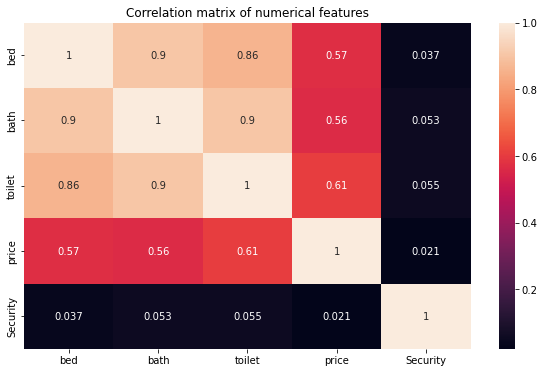

In [71]:
# select numerical columns
num_cols = ['bed', 'bath', 'toilet', 'price', 'Security']

# calculate the correlation matrix
corr_matrix = lagos_data[num_cols].corr()

# visualize the correlation matrix with heatmap
plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation matrix of numerical features')
plt.show()